<a href="https://colab.research.google.com/github/jaysonbarretti/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN

### Importer les bibliothèques :

In [ ]:
import tensorflow as tf
tf.__version__ # vérifier la version du tensorflow

'2.3.0'

### Initialisation du CNN :

In [ ]:
classifier = tf.keras.models.Sequential()

### Étape 1 - Convolution :

In [ ]:
# sintaxe simplificada -> tf.keras.layers.Conv2D(filters, kernel_size, input_shape = (a, b, c), activation = 'relu')
# - filters = quantidade de filtros (matriz feature detector) que será usado na convolução da imagem;
# - input_shape = tamaho da imagem;
# - kernel_size = tamanho da matriz feature detector;
# - a função de ativação 'relu' substitui todos os 'valores negativos' por 'zero'.

classifier.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape = (150, 150, 3), activation = 'relu'))

### Étape 2 - Pooling :

In [ ]:
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2))) 
# Essa sumarização através de uma pequena matriz chamada 'pool_size' de dados serve para diminuir 
# a quantidade de pesos a serem aprendidos e também para evitar overfitting.

In [ ]:
# Ajout d'une deuxième couche convolutionnelle :
classifier.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

In [ ]:
# Ajout d'une troisième couche convolutionnelle :
classifier.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

In [ ]:
# Ajout d'une quatrième couche de convolution : 
classifier.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

### Étape 3 - Flattening (aplatissement) :

In [ ]:
classifier.add(tf.keras.layers.Flatten())

### Étape 4 - Full connection (Connexion complète) :

In [ ]:
classifier.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
classifier.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
classifier.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))

In [ ]:
#  pour eviter le probleme de surentrainnemnt( ca dire le modele est trop fort sur le jeu de données d'entrainnement et ne faible sur les données de test ajouer le dropout
#  le dropout, elle va déactiver certaines neurones avec un certain de probabilité
#  ici chaque neurones a la chance de 30% d'etre d'eactivé a chaque etape d'entrainneemnt
#  qui va permer de diminuer le surentrainnement :

classifier.add(tf.keras.layers.Dropout(0.5))

In [ ]:
# Ajout la couche de sortie :
classifier.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
# Compilation du CNN :
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Part 2 - Entrainer le CNN :

In [ ]:
# Initialisez tous les paramètres :

target_size = (150, 150)
batch_size = 32
epochs = 20

In [ ]:
# Télécharger les bases de données :

from google.colab import drive
drive.mount('/content/drive')

# ('/content/drive/My Drive/DL_CegepSteFoy/Jour-3/data/data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Gerando mais imagens a partir das imagens do dataset. Quantos mais imagens tivermos, menos erros de 'overfitting', teremos :

from keras.preprocessing.image import ImageDataGenerator

# instanciando o método 'ImageDataGenerator para dados de treinamento :
train_datagen = ImageDataGenerator(rescale = 1./255, # normalizar a imagem com valores entre '0' e '1'
                                   shear_range = 0.2, # tozar a image
                                   zoom_range = 0.2,
                                   horizontal_flip = True) # virar a imagem na horizontal

# instanciando o método 'ImageDataGenerator para dados de treinamento :
test_datagen = ImageDataGenerator(rescale = 1./255)



# n'oublier pas de modifier la taille des images, pour que je l'adapte par rapport a notre nouveau modele :
# não se esqueça de modificar o tamanho das imagens, para que eu adapte ao nosso novo modelo:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/DL_CegepSteFoy/Jour-4/1-partie-1/TPs/dataset/training_set',
                                                 target_size = target_size,
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/DL_CegepSteFoy/Jour-4/1-partie-1/TPs/dataset/test_set',
                                            target_size = target_size,
                                            batch_size = batch_size,
                                            class_mode = 'binary')

Found 5424 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
img_training_set = training_set.samples
img_test_set = test_set.samples
print("Quantité d'images de training_set :", img_training_set)
print("Quantité d'images de test_set :", img_test_set)

Quantité d'images de training_set : 5424
Quantité d'images de test_set : 2000


In [ ]:
# model.summary () est utilisé pour voir tous les paramètres et formes dans chaque couche de nos modèles :
classifier.summary()

In [ ]:
# Définition des callbacks pour régler les hyperparamètres :

callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(patience = 20, factor = 0.5, verbose = True),
    tf.keras.callbacks.ModelCheckpoint('meilleur_classifier', save_best_only = True),
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 25, verbose = True)
]

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Paramètres :
steps_per_epoch = (img_training_set / batch_size)  # 5424 (imagens para treinamento) / 32 (batch_size) = 169.5 ~ 170
validation_steps = (img_test_set / batch_size)  # 2000 (imagens para validação/teste) / 32 (batch_size) = 62.5 ~ 63

# Entraîner le modèle :
history = classifier.fit_generator(training_set,  
                                   callbacks = callbacks,
                                   steps_per_epoch = steps_per_epoch, 
                                   epochs = epochs,
                                   validation_data = test_set,
                                   validation_steps = validation_steps, 
                                   verbose = 1)

#model1.evaluate(test_data, test_labels_one_hot)

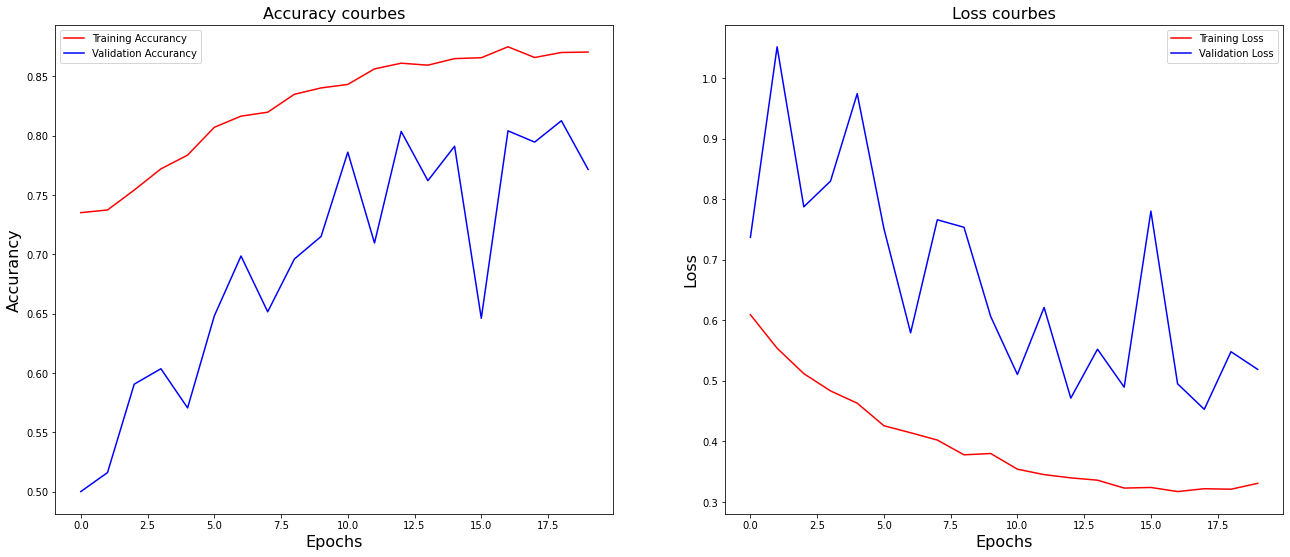

In [ ]:
# Accuracy vs Epochs and Loss vs Epochs graphs :
import matplotlib.pyplot as plt

fig1, f1_axes = plt.subplots(ncols=2, nrows=1, figsize = (22,9))

f1_axes[0].set_title('Accuracy courbes', fontsize = 16)
f1_axes[0].plot(history.history['accuracy'],'r')
f1_axes[0].plot(history.history['val_accuracy'],'b')
f1_axes[0].legend(['Training Accurancy', 'Validation Accurancy'])
f1_axes[0].set_xlabel('Epochs', fontsize=16)
f1_axes[0].set_ylabel('Accurancy', fontsize=16)

f1_axes[1].set_title('Loss courbes', fontsize = 16)
f1_axes[1].plot(history.history['loss'],'r')
f1_axes[1].plot(history.history['val_loss'],'b')
f1_axes[1].legend(['Training Loss', 'Validation Loss'])
f1_axes[1].set_xlabel('Epochs', fontsize=16)
f1_axes[1].set_ylabel('Loss', fontsize=16)

plt.savefig('Accuracy_Loss_courbes.png')

### Enregistrement du modèle entraîné :

In [ ]:
classifier.save('model_classifier.h5')

### Partie 3 : Faire de nouvelles prédictions :

In [ ]:
import numpy as np

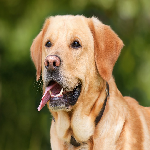

In [ ]:
# charger l'image sur laquel on va faire da prédiction et l'enregistrer dans une variable :

test_image = tf.keras.preprocessing.image.load_img(('/content/drive/My Drive/DL_CegepSteFoy/Jour-4/1-partie-1/TPs/dataset/single_prediction/cat_or_dog_1.jpg'), target_size = target_size)
test_image

In [ ]:
# Biblioteca para processamento de imagens -> PIL(Python Image Library).

type(test_image)

PIL.Image.Image

In [ ]:
# características da image :
print(test_image.mode)
print(test_image.size)

RGB
(150, 150)


In [ ]:
# L'image doit avoir 3 dimensions RVB (RGB), la methode suivante va transformer l'image ci-dessus en image en 3 dimensions :
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image.shape

(150, 150, 3)

In [ ]:
# ici, on doit ajouter une 4 dimensions qui indique l'image appartient a quel groupe (malgrés juste une image) :
test_image = np.expand_dims(test_image, axis = 0)
test_image.shape

(1, 150, 150, 3)

In [ ]:
# lancer la prediction :
result = classifier.predict(test_image)
print(result)

[[1.]]


In [ ]:
# ici pour verifier l'indice 1 pour chien ou bien chat :
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
# affichier prediction comprehensible :
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print('Resultado da predição :', prediction)

Resultado da predição : dog
